/Users/msteiner/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



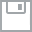
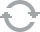
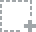
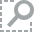
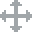
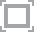
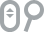
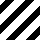
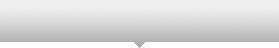
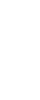
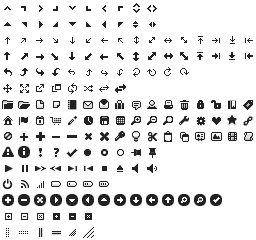
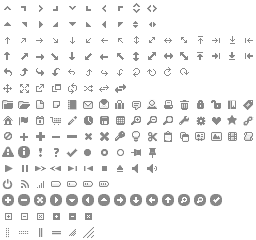
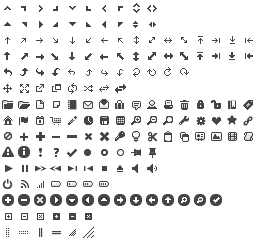
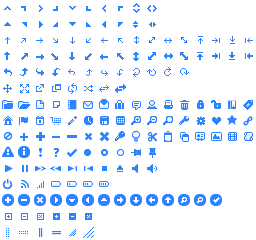
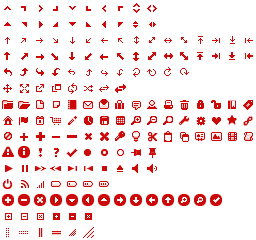
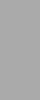
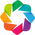
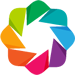

In [1]:
from __future__ import division
import pandas as pd
import matplotlib as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.us_states import data as states
from bokeh.sampledata.unemployment import data as unemployment
import sklearn as sk
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d
output_notebook()
#%matplotlib inline

### functions

In [2]:
#SF open data SODA import function
# https://data.sfgov.org/

def sf_open_data_soda(data_url, n_rows_page, n_pages):
    r_page = n_rows_page
    d_url = data_url
    data_list = []
    
    for i in range(n_pages):
        d_url_full = d_url + '?$limit=' + str(r_page) + '&$offset=' + str((r_page * i) + 1)
        data_list.append(pd.read_json(d_url_full))
        
        
    df_data = pd.concat(data_list)
    
    return df_data

In [3]:
#SF Crime Data Formatting function

def crime_data_format(df, crime):
    type_crime = crime
    df_data = df
    df_data_crime = df_sf_open_data_crime[df_sf_open_data_crime['category']==type_crime]
    df_crime_loc = df_data_crime.ix[:,['y', 'x']]
    
    return df_crime_loc
    

### import data

In [4]:
#Data Import Food Inspection
#https://data.sfgov.org/Health-and-Social-Services/Food-Inspections-LIVES-Standard/pyih-qa8i
df_sf_open_data_import_food_insp = sf_open_data_soda('https://data.sfgov.org/resource/sipz-fjte.json',500,4)
                                                   

In [5]:
#Data Import Housing Eviction
df_sf_open_data_import_eviction = sf_open_data_soda('https://data.sfgov.org/resource/93gi-sfd2.json',500,4)

In [17]:
#Data Import Crime Incidents from Jan 2003
df_sf_open_data_crime = sf_open_data_soda('https://data.sfgov.org/resource/gxxq-x39z.json',5000,4)

In [7]:
#Fire Incidents
#https://data.sfgov.org/Public-Safety/Fire-Incidents/wr8u-xric
df_sf_open_data_fire = sf_open_data_soda('https://data.sfgov.org/resource/wbb6-uh78.json', 500,4)

In [8]:
#Recreation and Park Department's Facility Conditions Assessment
#https://data.sfgov.org/Culture-and-Recreation/Recreation-and-Park-Department-s-Facility-Conditio/dza3-i9eu
df_sf_open_data_PR_cond = sf_open_data_soda('https://data.sfgov.org/resource/8qx5-fqbx.json', 500,4)

In [9]:
#Community Resiliency Indicator System
#https://data.sfgov.org/Health-and-Social-Services/Community-Resiliency-Indicator-System/banc-xdvr
df_sf_open_data_Com_res = pd.read_json('https://data.sfgov.org/resource/banc-xdvr.json')

In [10]:
#San Francisco Flood Health Vulnerability
#https://data.sfgov.org/Health-and-Social-Services/San-Francisco-Flood-Health-Vulnerability/cne3-h93g
df_sf_open_data_flood_health = sf_open_data_soda('https://data.sfgov.org/resource/sn9p-b932.json', 500,4)

### Food Inspection

### data munging

In [11]:
df_sf_open_data_import_food_insp['risk_category_num'] = (
    df_sf_open_data_import_food_insp['risk_category'].map({'Low Risk':1, 'Moderate Risk':2,'High Risk':3}))

df_risk_low=df_sf_open_data_import_food_insp[df_sf_open_data_import_food_insp['risk_category_num']==1]
df_risk_mod=df_sf_open_data_import_food_insp[df_sf_open_data_import_food_insp['risk_category_num']==2]
df_risk_high=df_sf_open_data_import_food_insp[df_sf_open_data_import_food_insp['risk_category_num']==3]
df_risk_low_pl  = df_risk_low.ix[:,['business_latitude','business_longitude']]
df_risk_mod_pl  = df_risk_mod.ix[:,['business_latitude','business_longitude']]
df_risk_high_pl = df_risk_high.ix[:,['business_latitude','business_longitude']]

In [12]:
from bokeh.sampledata.world_cities import data
from bokeh.plotting import *
from bokeh.models import (
    GMapOptions, GMapPlot, ColumnDataSource, PanTool, WheelZoomTool, Circle, Range1d
)

s1 = GMapPlot(
    x_range=Range1d(-160, 160), y_range=Range1d(-80, 80),
    plot_width=1000,plot_height=500,
    map_options=GMapOptions(lat=37.755, lng=-122.39, zoom=12),
    title="San Francisco Health Inspection Results",
    webgl=True, responsive=True)

circle1 = Circle(x="business_longitude", y='business_latitude', 
                 size=4, line_color=None, fill_color='blue', fill_alpha=0.6)
s1.add_glyph(ColumnDataSource(df_risk_low_pl), circle1)

circle2 = Circle(x="business_longitude", y='business_latitude', 
                size=6, line_color=None, fill_color='green', fill_alpha=0.4)
s1.add_glyph(ColumnDataSource(df_risk_mod_pl), circle2)

circle3 = Circle(x="business_longitude", y='business_latitude', 
                size=10, line_color=None, fill_color='red', fill_alpha=0.1)
s1.add_glyph(ColumnDataSource(df_risk_mod_pl), circle3)

s1.add_tools(PanTool(), WheelZoomTool())

# prepare some data
N = 100
#x = np.linspace(0, 4*np.pi, N)
#y0 = np.sin(x)

# create a new plot
#s2 = figure(width=250, plot_height=500, title="Legnd")
#s2.circle(x, y0, size=10, color="navy", alpha=0.5)
s2 = figure(width=250, plot_height=500, title="Legend")
s2.circle(1, 0, size=0, color="blue", alpha=0.5,legend="Low Risk")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

#s2 = figure(width=250, plot_height=500, title="Legend")
s2.circle(1, .25, size=0, color="green", alpha=0.5,legend="Moderate Risk")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

s2.circle(1, .5, size=0, color="red", alpha=0.5,legend="High Risk")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

p=gridplot([[s1,s2]])
show(p)

### crime

### data munging

In [18]:
df_open_data_crime_assualt=df_sf_open_data_crime[df_sf_open_data_crime['category']=='ASSAULT']
df_open_data_crime_burglary=df_sf_open_data_crime[df_sf_open_data_crime['category']=='BURGLARY']
df_open_data_crime_sex_offense=df_sf_open_data_crime[df_sf_open_data_crime['category']=='SEX OFFENSES, FORCIBLE']
df_open_data_crime_vehicle_theft=df_sf_open_data_crime[df_sf_open_data_crime['category']=='VEHICLE THEFT']
df_open_data_crime_weapon=df_sf_open_data_crime[df_sf_open_data_crime['category']=='WEAPON LAWS']
df_open_data_crime_prostitution=df_sf_open_data_crime[df_sf_open_data_crime['category']=='PROSTITUTION']
df_open_data_crime_arson=df_sf_open_data_crime[df_sf_open_data_crime['category']=='ARSON']

In [19]:
df_open_data_crime_assualt_pl  = crime_data_format(df_sf_open_data_crime, 'ASSAULT')
df_open_data_crime_burglary_pl = crime_data_format(df_sf_open_data_crime, 'BURLARY')
df_open_data_crime_sex_offense_pl = crime_data_format(df_sf_open_data_crime, 'SEX OFFENSES, FORCIBLE')
df_open_data_crime_vehicle_theft_pl = crime_data_format(df_sf_open_data_crime, 'VEHICLE THEFT')
df_open_data_crime_weapon_pl = crime_data_format(df_sf_open_data_crime, 'WEAPON LAWS')
df_open_data_crime_prostitution_pl = crime_data_format(df_sf_open_data_crime, 'PROSTITUTION')
df_open_data_crime_arson_pl = crime_data_format(df_sf_open_data_crime, 'ARSON')

In [20]:
from bokeh.sampledata.world_cities import data
from bokeh.plotting import *
from bokeh.models import (
    GMapOptions, GMapPlot, ColumnDataSource, PanTool, WheelZoomTool, Circle, Range1d
)

s1 = GMapPlot(
    x_range=Range1d(-160, 160), y_range=Range1d(-80, 80),
    plot_width=1000,plot_height=500,
    map_options=GMapOptions(lat=37.755, lng=-122.39, zoom=12),
    title="San Francisco Crime",
    webgl=True, responsive=True)

circle1 = Circle(x="x", y='y', 
                 size=5, line_color=None, fill_color='red', fill_alpha=0.8)
s1.add_glyph(ColumnDataSource(df_open_data_crime_assualt_pl), circle1)

circle2 = Circle(x="x", y='y', 
                size=7, line_color=None, fill_color='orange', fill_alpha=0.7)
s1.add_glyph(ColumnDataSource(df_open_data_crime_burglary_pl), circle2)

circle3 = Circle(x="x", y='y', 
                size=9, line_color=None, fill_color='yellow', fill_alpha=0.6)
s1.add_glyph(ColumnDataSource(df_open_data_crime_sex_offense_pl), circle3)

circle4 = Circle(x="x", y='y', 
                size=11, line_color=None, fill_color='green', fill_alpha=0.5)
s1.add_glyph(ColumnDataSource(df_open_data_crime_vehicle_theft), circle4)

circle5 = Circle(x="x", y='y', 
                size=13, line_color=None, fill_color='blue', fill_alpha=0.4)
s1.add_glyph(ColumnDataSource(df_open_data_crime_weapon_pl), circle5)

circle6 = Circle(x="x", y='y', 
                size=15, line_color=None, fill_color='indigo', fill_alpha=0.3)
s1.add_glyph(ColumnDataSource(df_open_data_crime_prostitution_pl), circle6)

circle7 = Circle(x="x", y='y', 
                size=17, line_color=None, fill_color='violet', fill_alpha=0.2)
s1.add_glyph(ColumnDataSource(df_open_data_crime_arson_pl), circle7)




s1.add_tools(PanTool(), WheelZoomTool())



# create a new plot
#s2 = figure(width=250, plot_height=500, title="Legnd")
#s2.circle(x, y0, size=10, color="navy", alpha=0.5)
s2 = figure(width=250, plot_height=500, title="Legend")
s2.circle(1, 0, size=0, color="red", alpha=0.5,legend="Assualt")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

#s2 = figure(width=250, plot_height=500, title="Legend")
s2.circle(1, .25, size=0, color="orange", alpha=0.5,legend="Burglary")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

s2.circle(1, .5, size=0, color="yellow", alpha=0.5,legend="Sex Offense Force")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

s2.circle(1, .75, size=0, color="green", alpha=0.5,legend="Vehicle Theft")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

s2.circle(1, 1, size=0, color="blue", alpha=0.5,legend="Weapon")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

s2.circle(1, 1.25, size=0, color="indigo", alpha=0.5,legend="Prostitution")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0

s2.circle(1, 1.5, size=0, color="violet", alpha=0.5,legend="Arson")
s2.axis.visible=None
s2.ygrid.grid_line_alpha=0
s2.xgrid.grid_line_alpha=0
s2.legend.border_line_alpha=0



p=gridplot([[s1,s2]])
show(p)